# ST2195 Analysis of commercial flights from 2006-2008

In [5]:
import sys
import subprocess

def install_package(package_name):
    try:
        print(sys.executable)
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"Successfully installed {package_name}")

    except subprocess.CalledProcessError as e:
        print(f"Error installing {package_name}: {e}")


In [6]:
install_package("pandas")
install_package("matplotlib")
install_package("seaborn")
install_package("sklearn")

/Library/Frameworks/Python.framework/Versions/3.8/bin/python3


You should consider upgrading via the 'pip install --upgrade pip' command.


/Library/Frameworks/Python.framework/Versions/3.8/bin/python3


You should consider upgrading via the 'pip install --upgrade pip' command.


/Library/Frameworks/Python.framework/Versions/3.8/bin/python3


You should consider upgrading via the 'pip install --upgrade pip' command.


/Library/Frameworks/Python.framework/Versions/3.8/bin/python3


You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
import os
import sklearn
import pandas
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np


ModuleNotFoundError: No module named 'sklearn'

In [13]:
# using os
directory_name = "data"
if not os.path.exists(directory_name):
    os.makedirs(directory_name)
    print(f"Directory '{directory_name}' created successfully.")
else:
    print(f"Directory '{directory_name}' already exists.")

Directory 'data' already exists.


# Read data files

* Takes 10 minutes for me to run this cell
* Uses up to 5GB RAM
* 54 million rows!


In [15]:
# all of the files in the data folder in this folder
data_files = [os.path.join("data", filename) for filename in os.listdir("data")]
#data_files = [data_files[-1], data_files[-2], data_files[-3]] # to save time

def bz2todataframe(file):
    print(f"reading {file}")
    return pandas.read_csv(file, compression="bz2", encoding='latin-1')


df = pandas.concat([bz2todataframe(file) for file in data_files])
df

NameError: name 'pandas' is not defined

In [10]:
#def to_datetime(row):
#    return pd.to_datetime(f"{row["Year"]}-{row["Month"]:02d}-{row["day"]:02d}")##

#dt = df.apply(to_datetime, axis = 1)
#print(dt)

# Utilities

In [ ]:
def hhmm_to_datetime(df_with_hhmm_index):
    hhmm = pandas.DataFrame(df_with_hhmm_index)
    
    hhmm["hours"] = hhmm.index.astype(int).astype(str).str[:-2].str.zfill(2)
    hhmm["minutes"] = hhmm.index.astype(int).astype(str).str[-2:].str.zfill(2)
    hhmm = hhmm[
        #when originally running error appeared '95' not valid - all lines with value removed
        #no value 60 exists for minutes on clock
        (~hhmm["minutes"].isin(["95", "60"])) &
        (~hhmm["hours"].isin(["24", "25", "26", "27", "28", "29"]))
        ]

    hhmm.index = pandas.to_datetime(hhmm["hours"] + hhmm["minutes"], format='%H%M').dt.time
    
    datetimes_df = hhmm.drop(columns=["hours", "minutes"])

    return datetimes_df


# 1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

When someone says "my flight was delayed", most of the time they are referring to departure delay

Therefore, I will assume delay to mean departure delay

### (a) best time of day

To find the best time of day, to minimise delays, We need to know the average delay for each time of the day.

In [ ]:
average_delay_per_time = df.groupby("DepTime")["DepDelay"].mean()
average_delay_per_time = hhmm_to_datetime(average_delay_per_time)
average_delay_per_time.sort_values(by="DepDelay")


,DepDelay
05:51:00,-7.260991
05:50:00,-7.105068
05:52:00,-7.032292
04:50:00,-6.701613
04:53:00,-6.619490
...,...
03:40:00,238.833333
03:35:00,244.818182
03:38:00,245.400000
04:22:00,287.416667


<Figure size 1000x600 with 0 Axes>

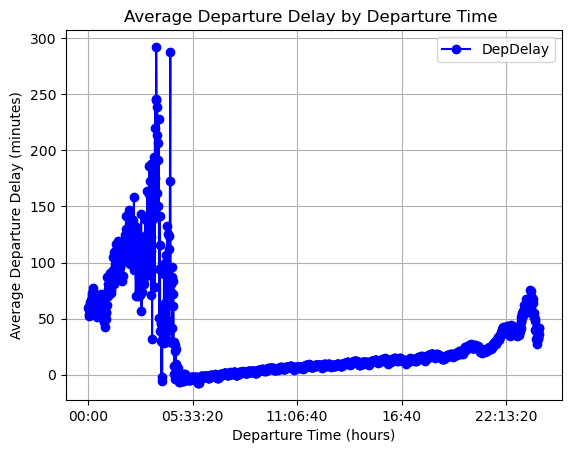

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
average_delay_per_time.plot(kind='line', marker='o', color='blue')

# Adding labels and title
plt.xlabel('Departure Time (hours)')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Departure Time ')
plt.grid(True)

# Display the plot
plt.show()

### (b) best day of the week

Same thing, just find the average delay for each day of the week.!

In [11]:
average_delay_per_week_day = df.groupby("DayOfWeek")["DepDelay"].mean()

day_mapping = {
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday",
    7: "Sunday",
}

average_delay_per_week_day.index = average_delay_per_week_day.index.map(day_mapping)

NameError: name 'df' is not defined

In [ ]:
plt.bar(average_delay_per_week_day.index, average_delay_per_week_day.values)

# Adding labels and title
plt.xlabel("Day of the Week")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay per Day of the Week")
plt.xticks(rotation=45)

# Display the graph
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

### (c) best time of year

The same, but for day of the year

In [ ]:
average_delay_per_calendar_day = df.groupby(["DayofMonth", "Month"])["DepDelay"].mean()

In [ ]:
def map_to_date(day_month):
    day, month = day_month
    # 2020
    return str(month) + "/" + str(day)

average_delay_per_calendar_day.index = average_delay_per_calendar_day.index.map(map_to_date)
average_delay_per_calendar_day.sort_values()

10/31     0.984630
10/30     2.151322
11/23     2.561170
9/26      2.564035
9/6       3.360414
           ...    
8/10     25.560745
12/21    26.296033
6/27     27.789525
12/22    30.655894
12/23    31.823472
Name: DepDelay, Length: 366, dtype: float64

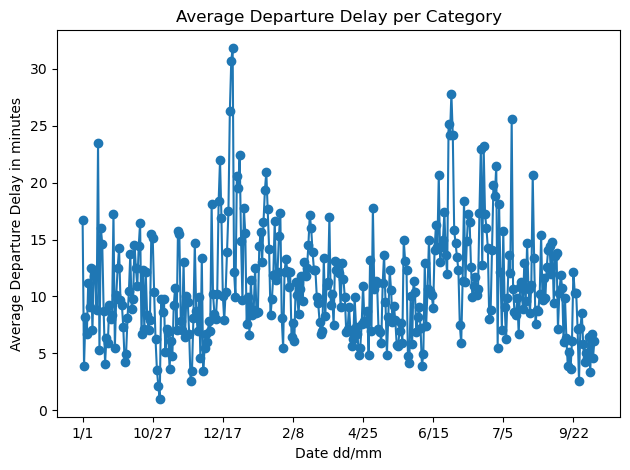

In [ ]:
average_delay_per_calendar_day =average_delay_per_calendar_day.sort_index()
average_delay_per_calendar_day.plot(marker='o')

# Adding labels and title
plt.xlabel("Date dd/mm")
plt.ylabel("Average Departure Delay in minutes")
plt.title("Average Departure Delay per Category")

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
average_delay_per_month = df.groupby(["Month"])["DepDelay"].mean()

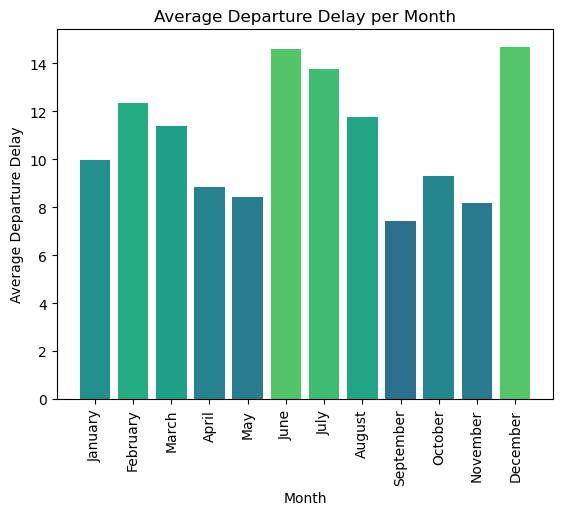

In [ ]:
month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

plt.bar(average_delay_per_month.index.map(month_mapping), average_delay_per_month.values, color=plt.cm.viridis(average_delay_per_month.values/20))

# Adding labels and title
plt.xlabel("Month")
plt.ylabel("Average Departure Delay")
plt.title("Average Departure Delay per Month")
plt.xticks(rotation="vertical")

# Display the graph
#plt.tight_layout()
plt.show()

# 2. Do older planes suffer more delays?

Trying to calculate the age exactly crashed my computer, so just use year instead

In [ ]:
plane_data = pandas.read_csv("plane-data.csv")


merged = pandas.merge(
    left=df[["TailNum", "DepDelay", "Year"]], 
    right=plane_data[["tailnum", "issue_date"]], 
    how='inner', 
    left_on='TailNum', 
    right_on='tailnum'
)
merged = merged.loc[merged["issue_date"].notna()]
merged["issue_year"] = merged['issue_date'].str[-4:].astype(int)

merged["age"] = merged["Year"].astype(int) - merged["issue_year"]


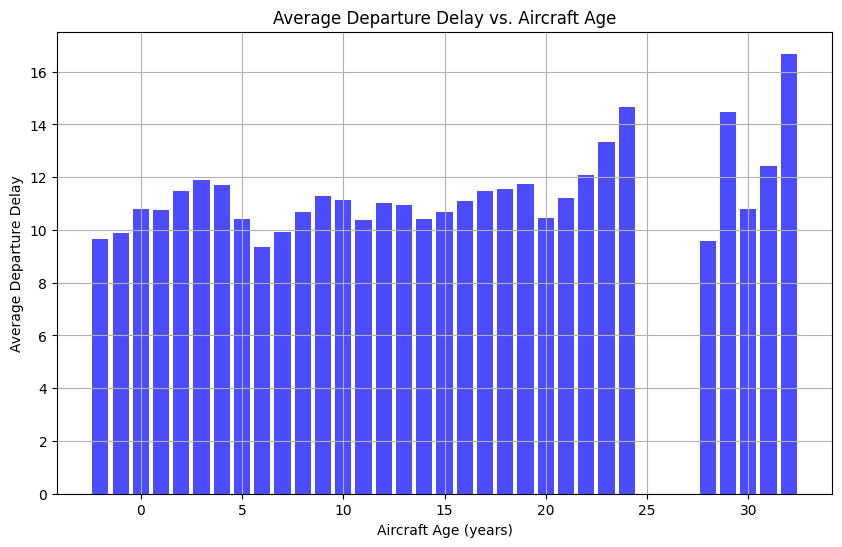

In [ ]:
grouped_age = merged.groupby("age")["DepDelay"].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped_age.index, grouped_age.values, width=0.8, color='b', alpha=0.7)
plt.xlabel("Aircraft Age (years)")
plt.ylabel("Average Departure Delay (minutes)")
plt.title("Average Departure Delay vs. Aircraft Age")
plt.grid(True)
plt.show()

# 3. How does the number of people flying between different locations change over time?

Per location, we just want to know the number of flights over time

Since it will be over a long period of time, monthly is reasonable


         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
295      2007      1           2          2   1345.0        1300   1453.0   
296      2007      1           2          2   1036.0        1040   1140.0   
297      2007      1           2          2    847.0         845    952.0   
298      2007      1           2          2   1613.0        1600   1725.0   
299      2007      1           2          2   2024.0        2005   2136.0   
...       ...    ...         ...        ...      ...         ...      ...   
2245520  2008      4           3          4   1228.0        1235   1432.0   
2245521  2008      4           4          5   1234.0        1235   1448.0   
2245522  2008      4           5          6   1230.0        1235   1422.0   
2245523  2008      4           6          7   1233.0        1235   1411.0   
2245524  2008      4           7          1   1230.0        1235   1423.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelle

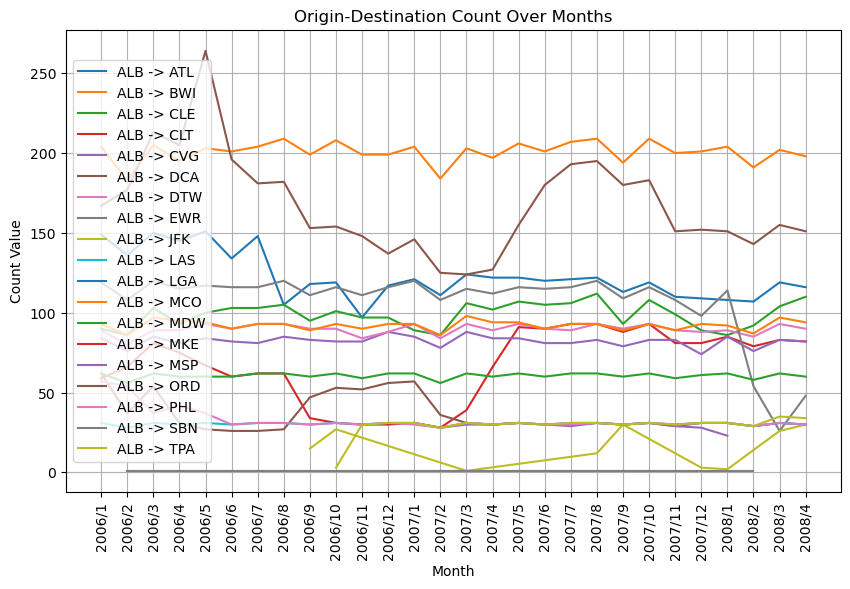

         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
129432   2007      1           1          1   1349.0        1323   1336.0   
130280   2007      1           2          2   1324.0        1323   1321.0   
130281   2007      1           2          2   1630.0        1553   1640.0   
131145   2007      1           3          3   1405.0        1323   1410.0   
131146   2007      1           3          3   1543.0        1553   1555.0   
...       ...    ...         ...        ...      ...         ...      ...   
2257477  2008      4          26          6   1511.0        1515   1603.0   
2257478  2008      4          27          7   1510.0        1515   1552.0   
2257479  2008      4          28          1   1511.0        1515   1558.0   
2257480  2008      4          29          2   1511.0        1515   1618.0   
2257481  2008      4          30          3   1510.0        1515   1555.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelle

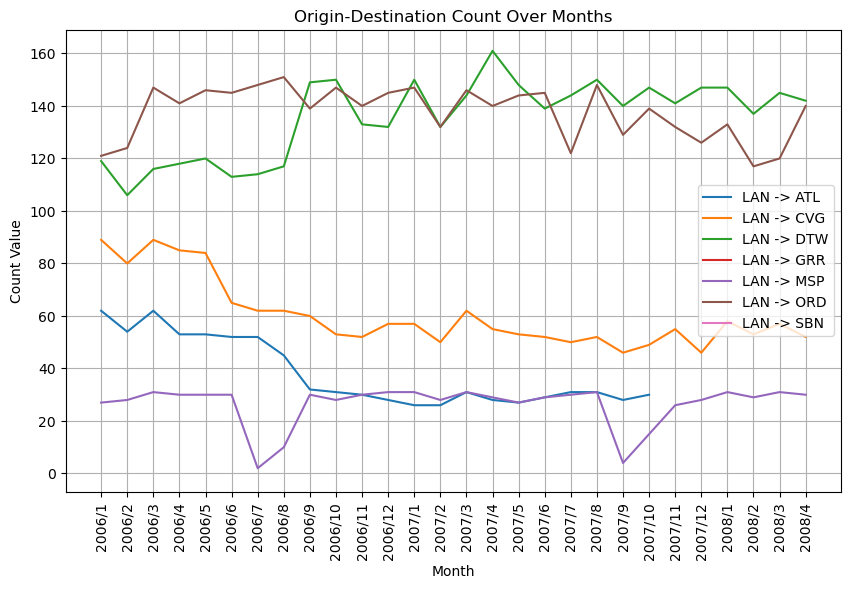

         Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
2747     2007      1           2          2   1321.0        1320   1456.0   
2748     2007      1           2          2   1450.0        1355   1607.0   
2749     2007      1           2          2   1440.0        1445   1556.0   
2750     2007      1           2          2   1904.0        1900   2014.0   
2751     2007      1           2          2    705.0         705    823.0   
...       ...    ...         ...        ...      ...         ...      ...   
2238963  2008      4           3          4   1755.0        1740   2024.0   
2239155  2008      4           3          4   1430.0        1440   1525.0   
2239261  2008      4           3          4    620.0         630    715.0   
2239451  2008      4           4          5   1047.0        1010   1257.0   
2239511  2008      4           4          5      NaN        1125      NaN   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelle

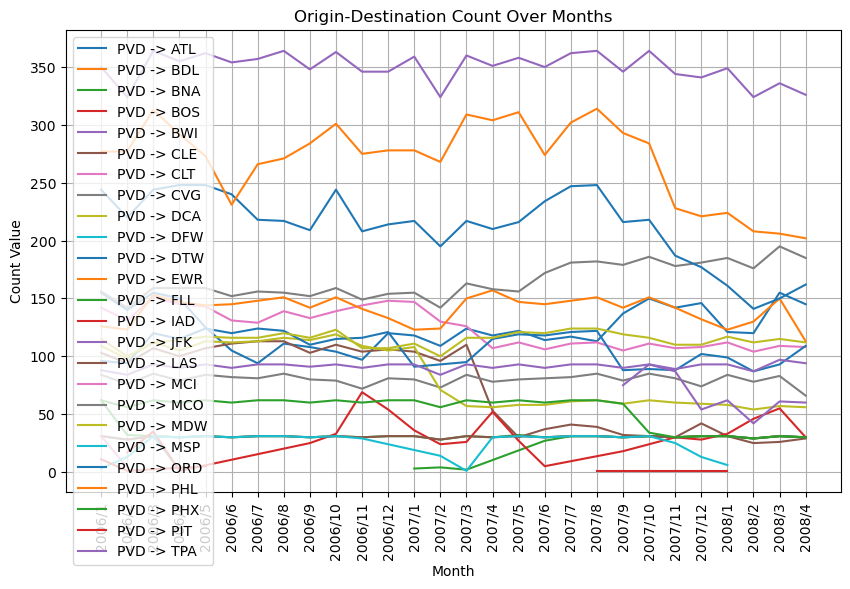

In [ ]:
import random
def map_to_date(year_month):
    year, month = year_month
    # 2020
    return str(year) + "/" + str(month)

# Plotting

origins = ["ALB", "LAN", "PVD"]
#origins = random.sample(list(df["Origin"].unique()), 3)
subset = df.loc[df["Origin"].isin(origins)]

for origin, group_data in subset.groupby("Origin"):
    print(group_data)
    plt.figure(figsize=(10, 6))

    for dest, group_group_data in group_data.groupby("Dest"):
        nice_name = origin + " -> " + dest
        
        flights_by_month = group_group_data.groupby(["Year", "Month"])["Year"].count()
        flights_by_month.sort_index(inplace=True)

        plt.plot(flights_by_month.index.map(map_to_date), flights_by_month.values, label=nice_name)

    plt.xlabel("Month")
    plt.ylabel("Count Value")
    plt.xticks(rotation="vertical")
    plt.title("Origin-Destination Count Over Months")
    plt.legend()
    plt.grid(True)
    plt.show()










# 4. Can you detect cascading failures as delays in one airport create delays in others?

This question could be rephrased as 

"Do late incoming flights cause late outgoing flights"

For any given day, at any given airport AIR, we can 
* calculate the average ArrDelay for Dest AIR
* calculate the average DepDelay for Origin AIR

then scatterplot

On days where there are lots of delayed arrivals, we would expect to see lots of delayed departures (if delays were cascading)

Let's also ignore flights which land the following day

In [ ]:
flight_samples = df.loc[df["DepTime"].notna() & df["ArrTime"].notna()]



In [ ]:
same_day_arrivals = flight_samples.loc[
    # if the arrival time is after the departure time, it must be the same day!
    flight_samples["DepTime"].astype(int) < flight_samples["ArrTime"].astype(int)
]

In [ ]:
# arrival delays, by destination, because arrival refers to destination airport
average_arrival_delays = same_day_arrivals.groupby(["Year", "Month", "DayofMonth", "Dest"])["ArrDelay"].mean()
# similarly, a departure delay is a delay at the origin airport
average_departure_delays = flight_samples.groupby(["Year", "Month", "DayofMonth", "Origin"])["DepDelay"].mean()

merged = pandas.merge(
    left=average_arrival_delays,
    right=average_departure_delays,
    left_on=average_arrival_delays.index,
    right_on=average_departure_delays.index
)
merged = merged.loc[
    (merged['DepDelay'] < 350) & 
    (merged['ArrDelay'] < 350) &
    (merged['DepDelay'] > -20) & 
    (merged['ArrDelay'] > -20)
    ]

r_value = np.corrcoef(merged['ArrDelay'], merged['DepDelay'])[0, 1]
print(r_value)


0.656650962397616


A correlation of 0.66 is a strong correlation

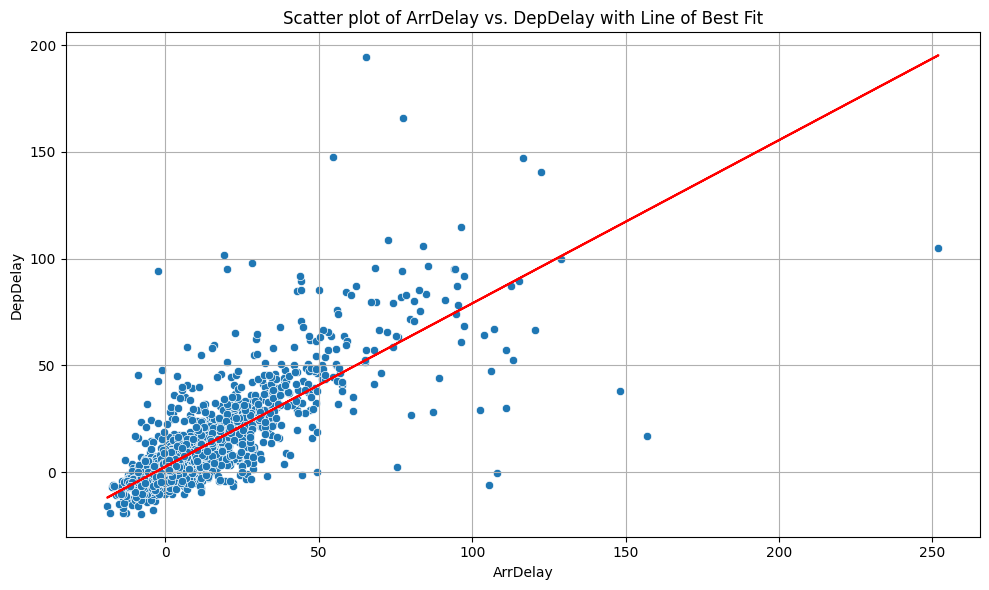

In [ ]:
# just use a sample of 2000, since this 
datapoints = merged.iloc[0:2000]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ArrDelay', y='DepDelay', data=datapoints)

# Line of best fit
m, b = np.polyfit(datapoints['ArrDelay'], datapoints['DepDelay'], 1)
plt.plot(datapoints['ArrDelay'], m*datapoints['ArrDelay'] + b, color='red')


plt.title('Scatter plot of ArrDelay vs. DepDelay with Line of Best Fit')
plt.xlabel('ArrDelay')
plt.ylabel('DepDelay')
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Use the available variables to construct a model that predicts delays

In [ ]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor


In [ ]:

# Data Cleaning
def remove_outliers_and_na(dataframe, columns):
    dataframe.dropna(inplace=True, subset=columns)
    return dataframe[dataframe["ArrDelay"] < 500]

def bool_to_int(val):
    return 1 if val else 0

# Dataset Preparation

numeric_cols = ["Distance", "Month"]
categorical_cols = ["Origin", "Dest", "TailNum"]
all_features = numeric_cols + categorical_cols

df = remove_outliers_and_na(df, all_features)
df_sampled = df.sample(n=50000)

# Transformers and Pipelines
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ("scaler", StandardScaler())
])

full_transformer = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_cols)
])

parameters = {
    'full_transformer__numeric__imputer__strategy': ['mean', 'median', 'most_frequent']
}

C:\Users\tom80\AppData\Local\Temp\ipykernel_18236\2294952697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.dropna(inplace=True, subset=columns)


In [ ]:
# Train-Test Split
X = df_sampled[all_features].copy()
y_binary = df_sampled["DepDelay"] > 0
y_continuous = df_sampled["Distance"].copy()

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=0)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(X, y_continuous, test_size=0.2, random_state=0)

def evaluate_model(test_data, predictions, model_score):
    print(model_score)
    print(np.sqrt(mean_squared_error(test_data, predictions)))
    print( mean_squared_error(test_data, predictions))
    print(mean_absolute_error(test_data, predictions))

print("not bad")
log_reg_pipeline = Pipeline([
    ('transformer', full_transformer),
    ('log_reg', LogisticRegression(max_iter=10000, penalty='none'))
])

print("bad")

log_reg_grid = GridSearchCV(log_reg_pipeline, param_grid=parameters)



not bad
bad


In [ ]:

grad_boost_pipeline = Pipeline([
    ('transformer', full_transformer),
    ('grad_boost', GradientBoostingClassifier(random_state=2))
])

grad_boost_grid = GridSearchCV(grad_boost_pipeline, param_grid=parameters)
grad_boost_grid.fit(X_train_bin, y_train_bin.values.ravel())
evaluate_model(y_test_bin, grad_boost_grid.predict(X_test_bin), grad_boost_grid.score(X_test_bin, y_test_bin))
plot_roc_curve(grad_boost_grid, X_test_bin, y_test_bin, ax=plt.gca(), name='Gradient Boosting')


ValueError: Invalid parameter 'full_transformer' for estimator Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Distance', 'Month'])])),
                ('grad_boost', GradientBoostingClassifier(random_state=2))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [ ]:

linear_reg_pipeline = Pipeline([
    ('transformer', full_transformer),
    ('linear_reg', LinearRegression())
])

linear_reg_grid = GridSearchCV(linear_reg_pipeline, param_grid=parameters)
linear_reg_grid.fit(X_train_cont, y_train_cont.values.ravel())
evaluate_model(y_test_cont, linear_reg_grid.predict(X_test_cont), linear_reg_grid.score(X_test_cont, y_test_cont))


NameError: name 'Pipeline' is not defined

In [ ]:

rand_forest_pipeline = Pipeline([
    ('transformer', full_transformer),
    ('rand_forest', RandomForestRegressor(random_state=0))
])

rand_forest_grid = GridSearchCV(rand_forest_pipeline, param_grid=parameters)
rand_forest_grid.fit(X_train_cont, y_train_cont.values.ravel())
evaluate_model(y_test_cont, rand_forest_grid.predict(X_test_cont), rand_forest_grid.score(X_test_cont, y_test_cont))


NameError: name 'Pipeline' is not defined